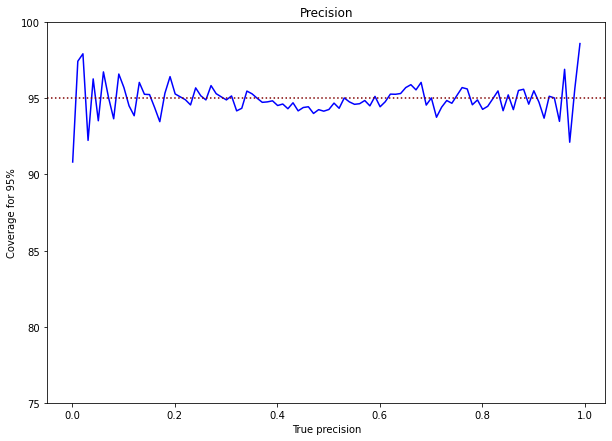

In [1]:
import numpy as np
from credible_region import beta
import matplotlib.pyplot as plt

numSamples = 10000
numTrials = 100

# For precision : propability of binomial = tp/(tp+fp)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tp = np.random.binomial(numTrials, prop, numSamples)
    fp = numTrials - tp
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tp[i], fp[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Precision')
plt.xlabel('True precision')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

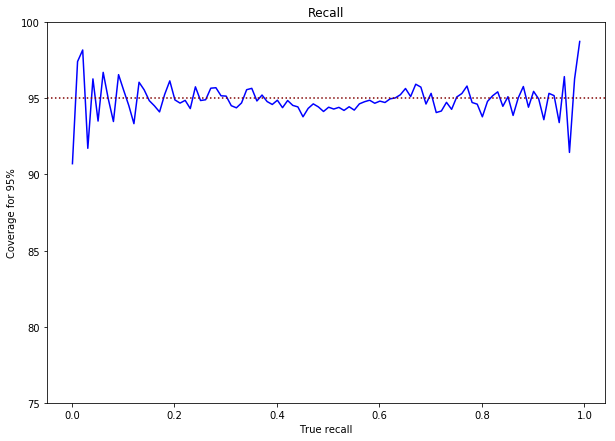

In [4]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For recall : propability of binomial = tp/(tp+fn)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tp = np.random.binomial(numTrials, prop, numSamples)
    fn = numTrials - tp
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tp[i], fn[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Recall')
plt.xlabel('True recall')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

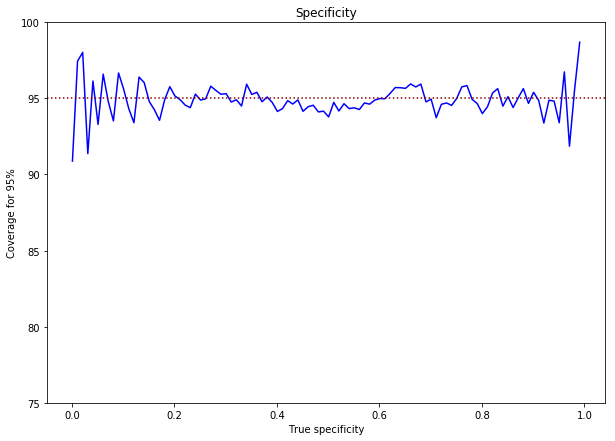

In [72]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For specificity : propability of binomial = tn/(tn+fp)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tn = np.random.binomial(numTrials, prop, numSamples)
    fp = numTrials - tn
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tn[i], fp[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Specificity')
plt.xlabel('True specificity')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

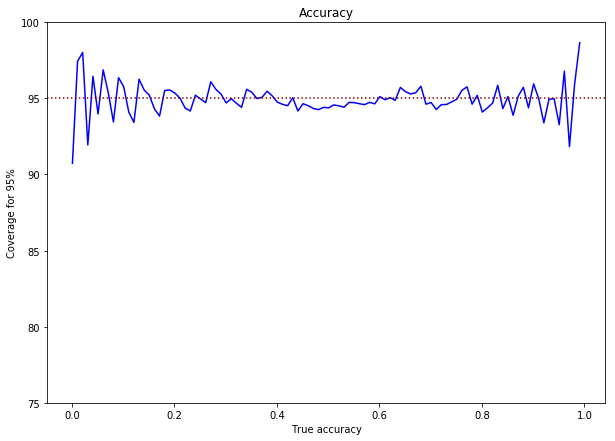

In [73]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For accuracy : propability of binomial = (tp+tn)/(tp+tn+fp+fn)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tpAndTn = np.random.binomial(numTrials, prop, numSamples)
    fpAndFn = numTrials - tpAndTn
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tpAndTn[i], fpAndFn[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Accuracy')
plt.xlabel('True accuracy')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

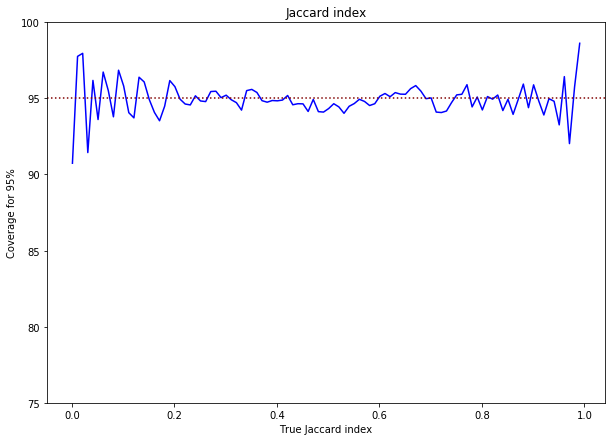

In [75]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
numSamples = 10000
numTrials = 100

# For Jaccard : propability of binomial = tp/(tp+fp+fn)
proportions = np.arange(0.001, 1, 0.01)
coverage = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    tp = np.random.binomial(numTrials, prop, numSamples)
    fpAndFn = numTrials - tp
    isCovered = np.empty(numSamples)
    for i in range(numSamples) :
        _,_, lowerCi, upperCi = beta(tp[i], fpAndFn[i], 0.5, 0.95)
        isCovered[i] = lowerCi <= prop and prop <= upperCi
    coverage[index] = np.mean(isCovered) * 100

plt.figure(figsize=(10,7))
plt.plot(proportions, coverage, color='blue')
plt.axhline(95, linestyle = 'dotted', color='maroon')
plt.title('Jaccard index')
plt.xlabel('True Jaccard index')
plt.ylabel('Coverage for 95%')
plt.ylim([75, 100])
plt.show()

[[0.632 0.629 0.629 ... 0.614 0.632 0.629]
 [0.849 0.868 0.849 ... 0.866 0.865 0.851]
 [0.946 0.951 0.951 ... 0.945 0.947 0.808]
 ...
 [1.    1.    1.    ... 0.923 0.852 0.894]
 [1.    1.    1.    ... 0.871 0.888 0.8  ]
 [1.    1.    1.    ... 0.913 0.787 0.851]]


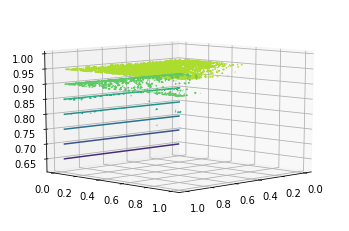

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from credible_region import f1_score
import math
import scipy.stats
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


numSamples = 1000
numTrials = 100
coverage = 0.95
lambda_ = 0.5


truepositivesprob = np.arange(0.01, 1, 0.01)
truenegativesprob = np.arange(0.01, 1, 0.01)
percentage_covered = np.empty([truepositivesprob.size, truenegativesprob.size])
for index, tpprob in enumerate(truepositivesprob): 
    tpbin = np.random.binomial(numTrials, tpprob, numSamples)
    fnbin = numTrials - tpbin
    tp = int(round(tpprob*numTrials))
    fn = numTrials - tp
    for index1, tnprob in enumerate(truenegativesprob):
        tnbin = np.random.binomial(numTrials, tnprob, numSamples)
        fpbin = numTrials - tnbin
        tn = int(round(tnprob*numTrials))
        fp = numTrials - tn
        F1scores = np.empty(numSamples)
        for i in range(numSamples) :
            if (tpbin[i]+fpbin[i]) == 0 :
                precision = 0
            else :
                precision = tpbin[i] / (tpbin[i]+fpbin[i])
            if (tpbin[i]+fnbin[i]) == 0 :
                recall = 0
            else :
                recall = tpbin[i] / (tpbin[i]+fnbin[i])
            if (precision + recall) == 0 :
                F1 = 0
            else :
                F1 = (2 * precision * recall)/(precision + recall)
            F1scores[i] = F1
        _,_, lowerCi, upperCi = f1_score(tp, fp, fn, lambda_, coverage, 100)
        sorted_f1scores = np.sort(F1scores)
        percentage_covered[index][index1] = np.count_nonzero((upperCi > sorted_f1scores) & (sorted_f1scores > lowerCi)) / numSamples

print(percentage_covered)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(10, 45)
ax.contour3D(truenegativesprob, truepositivesprob, percentage_covered)



In [12]:
from credible_region import beta
import numpy as np
import matplotlib.pyplot as plt
import random

numTrials = 100

proportions = np.arange(0.01, 1, 0.01)
percentage_covered = np.empty(proportions.size)
for index, prop in enumerate(proportions) : 
    totaltp = np.random.binomial(4*numTrials, prop)
    totalfp = 4*numTrials - totaltp
    pool = np.append(np.zeros(totalfp), np.ones(totaltp))
    np.random.shuffle(pool)
    set1, set2, set3, set4 = np.array_split(pool, 4)
    tp1 = np.count_nonzero(set1)
    fp1 = numTrials - tp1
    tp2 = np.count_nonzero(set2)
    fp2 = numTrials - tp2
    tp3 = np.count_nonzero(set3)
    fp3 = numTrials - tp3
    tp4 = np.count_nonzero(set4)
    fp4 = numTrials - tp4
    
    _,_, lowerCiset1, upperCiset1 = beta(tp1, fp1, 0.5, 0.95)
    _,_, lowerCiset2, upperCiset2 = beta(tp2, fp2, 0.5, 0.95)
    _,_, lowerCiset3, upperCiset3 = beta(tp3, fp3, 0.5, 0.95)
    _,_, lowerCiset4, upperCiset4 = beta(tp4, fp4, 0.5, 0.95)
    lowerCi_mean = (lowerCiset1 + lowerCiset2 + lowerCiset3 + lowerCiset4) / 4
    upperCi_mean = (upperCiset1 + upperCiset2 + upperCiset3 + upperCiset4) / 4
    
    _,_, lowerCi_total, upperCi_total = beta(totaltp, totalfp, 0.5, 0.95)
    
    if lowerCi_mean < lowerCi_total and upperCi_mean > upperCi_total :
        percentage_covered[index] = 1
    elif lowerCi_mean > lowerCi_total and upperCi_mean < upperCi_total :
        percentage_covered[index] = 0
    else :
        percentage_covered[index] = 0.5
            
print(percentage_covered)


[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  0.5]


In [24]:
from credible_region import beta
from credible_region import beta_posterior
import numpy as np
import matplotlib.pyplot as plt
import random

# def cross_folding(TP1, FP1, TP2, FP2, nb_samples):
#     # first cross folding
#     numTrials1 = TP1 + FP1
#     pool1 = np.append(np.zeros(FP1), np.ones(TP1))
#     np.random.shuffle(pool1)
#     set1_1, set1_2 = np.array_split(pool1, 2)
#     tp1_1 = np.count_nonzero(set1_1)
#     fp1_1 = set1_1.size - tp1_1
#     tp1_2 = np.count_nonzero(set1_2)
#     fp1_2 = set1_2.size - tp1_2
#     beta_post1_1 = beta_posterior(tp1_1, fp1_1, 0.5, nb_samples)
#     beta_post1_2 = beta_posterior(tp1_2, fp1_2, 0.5, nb_samples)
#     #second cross folding
#     numTrials2 = TP2 + FP2
#     pool2 = np.append(np.zeros(FP2), np.ones(TP2))
#     np.random.shuffle(pool2)
#     set2_1, set2_2 = np.array_split(pool2, 2)
#     tp2_1 = np.count_nonzero(set2_1)
#     fp2_1 = set2_1.size - tp2_1
#     tp2_2 = np.count_nonzero(set2_2)
#     fp2_2 = set2_2.size - tp2_2
#     beta_post2_1 = beta_posterior(tp2_1, fp2_1, 0.5, nb_samples)
#     beta_post2_2 = beta_posterior(tp2_2, fp2_2, 0.5, nb_samples)
#     return np.count_nonzero(beta_post1_1 > beta_post1_2) / nb_samples, np.count_nonzero(beta_post2_1 > beta_post2_2) / nb_samples

# first_cross_comp, second_cross_comp = cross_folding(50, 50, 52, 48, 100)
# print(first_cross_comp)
# print(second_cross_comp)

def folding_monte_carlo(TP1, FP1, TP2, FP2, nb_samples):
    lower_scores = np.empty(nb_samples)
    upper_scores = np.empty(nb_samples)
    numTrials1 = (TP1 + FP1)
    tp1prob = TP1 / numTrials1
    tp1bin = np.random.binomial(numTrials1, tp1prob, nb_samples)
    fp1bin = numTrials1 - tp1bin
    numTrials2 = (TP2 + FP2)
    tp2prob = TP2 / numTrials2
    tp2bin = np.random.binomial(numTrials2, tp2prob, nb_samples)
    fp2bin = numTrials2 - tp2bin
    for i in range(nb_samples):
        _,_, lowerCiset1, upperCiset1 = beta(tp1bin[i], fp1bin[i], 0.5, 0.95)
        _,_, lowerCiset2, upperCiset2 = beta(tp2bin[i], fp2bin[i], 0.5, 0.95)
        lowerCi_mean = (lowerCiset1 + lowerCiset2) / 2
        lower_scores[i] = lowerCi_mean
        upperCi_mean = (upperCiset1 + upperCiset2) / 2
        upper_scores[i] = upperCi_mean
    return np.mean(lower_scores), np.mean(upper_scores)

def cross_folding(TP, FP, nb_samples, nb_cross_folding):
    lower_cross_folding_scores = np.empty(nb_cross_folding)
    upper_cross_folding_scores = np.empty(nb_cross_folding)
    for i in range(nb_cross_folding):
        numTrials = TP + FP
        pool = np.append(np.zeros(FP), np.ones(TP))
        np.random.shuffle(pool)
        set1, set2 = np.array_split(pool, 2)
        tp1 = np.count_nonzero(set1)
        fp1 = set1.size - tp1
        tp2 = np.count_nonzero(set2)
        fp2 = set2.size - tp2
        lower_cross_folding_scores[i], upper_cross_folding_scores[i] = folding_monte_carlo(tp1, fp1, tp2, fp2, nb_samples)
    print(lower_cross_folding_scores)
    print(upper_cross_folding_scores)
    return np.mean(lower_cross_folding_scores), np.mean(upper_cross_folding_scores)

low, upp = cross_folding(100, 100, 100, 20)
print(low)
print(upp)

[0.40734954 0.40415336 0.39856724 0.40611272 0.40022445 0.4053214
 0.40631056 0.4004338  0.40156185 0.40218178 0.40479005 0.40848757
 0.40803188 0.39959715 0.40465647 0.39932969 0.40850086 0.40866632
 0.40890516 0.402043  ]
[0.59983971 0.59672103 0.59084316 0.59777341 0.59287776 0.59788461
 0.59514667 0.59227976 0.5942606  0.59470934 0.59725015 0.60113051
 0.60003175 0.59214491 0.59680078 0.59163516 0.60092291 0.60056313
 0.60071292 0.59358512]
0.404261242713314
0.5963556695627592


[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]
 ...
 [0.97 0.97 0.97 ... 0.97 0.97 0.97]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]]
[[0.01       0.01010101 0.01020408 ... 0.25       0.33333333 0.5       ]
 [0.01980198 0.02       0.02020202 ... 0.4        0.5        0.66666667]
 [0.02941176 0.02970297 0.03       ... 0.5        0.6        0.75      ]
 ...
 [0.49489796 0.4974359  0.5        ... 0.97       0.97979798 0.98979592]
 [0.49746193 0.5        0.5025641  ... 0.97029703 0.98       0.98989899]
 [0.5        0.50253807 0.50510204 ... 0.97058824 0.98019802 0.99      ]]


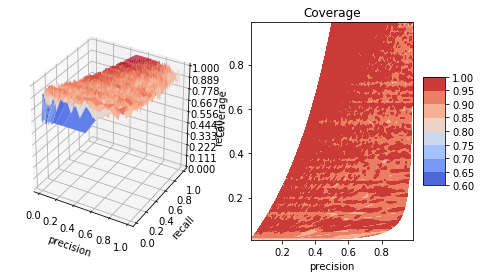

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from credible_region import f1_score
import math
import scipy.stats
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def F1_percentage(nb_samples, nb_positives, coverage, lambda_, truepositivesprob, truenegativesprob, ratio):
    percentage_covered = np.empty([truepositivesprob.size, truenegativesprob.size])
#     precisions = np.empty(truepositivesprob.size)
#     recalls = np.empty(truepositivesprob.size)
    precisions = np.empty([truepositivesprob.size, truenegativesprob.size])
    recalls = np.empty([truepositivesprob.size, truenegativesprob.size])
    for index, tpprob in enumerate(truepositivesprob):
        tpbin = np.random.binomial(nb_positives, tpprob, nb_samples)
        fnbin = nb_positives - tpbin
        tp = int(round(tpprob*nb_positives))
        fn = nb_positives - tp
        for index1, tnprob in enumerate(truenegativesprob):
            nb_negatives = int(round(nb_positives * ratio))
            tnbin = np.random.binomial(nb_negatives, tnprob, nb_samples)
            fpbin = nb_negatives - tnbin
            tn = int(round(tnprob*nb_negatives))
            fp = nb_negatives - tn
            F1scores = np.empty(nb_samples)
            for i in range(nb_samples) :
                if (tpbin[i]+fpbin[i]) == 0 :
                    precision = 0
                else :
                    precision = tpbin[i] / (tpbin[i]+fpbin[i])
                if (tpbin[i]+fnbin[i]) == 0 :
                    recall = 0
                else :
                    recall = tpbin[i] / (tpbin[i]+fnbin[i])
                if (precision + recall) == 0 :
                    F1 = 0
                else :
                    F1 = (2 * precision * recall)/(precision + recall)
#                 print(precision)
#                 print(recall)
                F1scores[i] = F1
#                 precisions[i] = precision
#                 recalls[i] = recall
            _,_, lowerCi, upperCi = f1_score(tp, fp, fn, lambda_, coverage, nb_samples)
            sorted_f1scores = np.sort(F1scores)
            percentage_covered[index][index1] = np.count_nonzero((upperCi > sorted_f1scores) & (sorted_f1scores > lowerCi)) / nb_samples
            precisions[index][index1] = 0 if (tp + fp) == 0 else tp/(tp + fp)
            recalls[index][index1] = 0 if (tp + fn) == 0 else tp/(tp + fn)
    return percentage_covered, recalls, precisions

truepositivesprob = np.arange(0.01, 1, 0.01) #x
truenegativesprob = np.arange(0.01, 1, 0.01) #y
# truepositivesprob = np.arange(0.1, 1, 0.1) #x
# truenegativesprob = np.arange(0.1, 1, 0.1) #y
nb_samples = 100
nb_positives = 100
coverage = 0.95
lambda_ = 0.5
ratio = 1
percentage_covered, recalls, precisions = F1_percentage(nb_samples, nb_trials, coverage, lambda_, truepositivesprob, truenegativesprob, ratio) #z
print(recalls)
print(precisions)

# Plot the surface.
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

# X, Y = np.meshgrid(truepositivesprob, truenegativesprob)
# print(X)
# print(Y)
# surf = ax1.plot_surface(X, Y, percentage_covered, cmap=cm.coolwarm, linewidth=0)
# cont = ax2.contourf(X, Y, percentage_covered, cmap=cm.coolwarm)
# ax1.set_xlabel("TPR")
# ax1.set_ylabel("TNR")
# ax1.set_zlabel("Coverage")
# ax2.set_xlabel("TPR")
# ax2.set_ylabel("TNR")
# ax2.set_title("Coverage")

# X, Y = np.meshgrid(truepositivesprob, truenegativesprob)
# print(X)
# print(Y)
surf = ax1.plot_surface(precisions, recalls, percentage_covered, cmap=cm.coolwarm, linewidth=0)
cont = ax2.contourf(precisions, recalls, percentage_covered, cmap=cm.coolwarm)

ax1.set_xlabel("precision")
ax1.set_ylabel("recall")
ax1.set_zlabel("Coverage")
ax2.set_xlabel("precision")
ax2.set_ylabel("recall")
ax2.set_title("Coverage")

# Customize the z axis.
ax1.set_zlim(0, 1)
ax1.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax1.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(cont, shrink=0.5, aspect=5)

plt.show()


In [1]:
import numpy

def average_beta_posterior(k, l, lambda_, nb_samples):
    """Simulates the beta posterior of a system with the provided markings

    This implementation is based on [GOUTTE-2005]_, equation 7.

    Figures of merit that are supported by this procedure are those which have
    the form :math:`v = k / (k + l)`:

    * Precision or Positive-Predictive Value (PPV): :math:`p = TP/(TP+FP)`, so
      :math:`k=TP`, :math:`l=FP`
    * Recall, Sensitivity, or True Positive Rate: :math:`r = TP/(TP+FN)`, so
      :math:`k=TP`, :math:`l=FN`
    * Specificity or True Negative Rage: :math:`s = TN/(TN+FP)`, so :math:`k=TN`,
      :math:`l=FP`
    * Accuracy: :math:`acc = TP+TN/(TP+TN+FP+FN)`, so :math:`k=TP+TN`,
      :math:`l=FP+FN`
    * Jaccard Index: :math:`j = TP/(TP+FP+FN)`, so :math:`k=TP`, :math:`l=FP+FN`

    Parameters
    ----------

    k : 1D int vector
        Depends on the figure of merit being considered (see above)

    l : 1D int vector
        Depends on the figure of merit being considered (see above)

    lambda_ : float
        The parameterisation of the Beta prior to consider. Use
        :math:`\lambda=1` for a flat prior.  Use :math:`\lambda=0.5` for
        Jeffrey's prior.

    nb_samples : int
        number of generated gamma distribution values


    Returns
    -------

    variates : numpy.ndarray
        An array with size ``nb_samples`` containing a realization of equation 7.

    """
    
    return numpy.random.beta(a=(k + lambda_), b=(l + lambda_), size=nb_samples)

k = numpy.array([20, 15, 23])
l = numpy.array([20, 25, 17])
average_beta_posterior(k, l, 0.5, 5)

ModuleNotFoundError: No module named 'numpy'